In [2]:
# Enable making data frames
import pandas as pd

# Importing numpy
import numpy as np

# Importing packages fo visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")

**Importing preprocessed data (combined sentiment and stock data)**

In [3]:
# Import already merged dataframe
merged = pd.read_csv('https://raw.githubusercontent.com/MariaRosendal/Tesla-tweets/main/merged.csv')

In [4]:
# Make dates to datetime format
merged['Date'] = pd.to_datetime(merged.Date)

#Set the date as index
merged.set_index('Date', inplace=True)

In [5]:
# Let's have a look
merged.head()

,Adj Close,change_categorical,daily_change_pred,Volume,daily_change,neg_sentiment,neu_sentiment,pos_sentiment,compound_sentiment,tweets_count
Date,,,,,,,,,,
2015-11-20,44.001999,Decrease,-1.027225,22003500.0,-0.807037,0.078,0.726,0.196,0.8481,6.0
2015-11-23,43.549999,Increase,0.229626,12631000.0,-1.027225,0.078,0.726,0.196,0.8481,0.0
2015-11-24,43.650002,Increase,5.218785,12401500.0,0.229626,0.020,0.821,0.158,0.9545,8.0
2015-11-25,45.928001,Increase,0.857858,19954000.0,5.218785,0.020,0.821,0.158,0.9545,0.0
2015-11-27,46.321999,Decrease,-0.582877,9747000.0,0.857858,0.020,0.821,0.158,0.9545,0.0


# Preprocessing of machine learning variables

For starters, we must ensure that the variables in our time series dataset is stationary before we use them as variables in our machine learning algoithms. This is because some of the data we have collected will have non-stationary trends. If spikes are erratic or follow a trend in some variables we cannot be sure that the algorithms will work properly.

To avoid this we test for stationarity in our variables and make sure that the non-stationary variables is transformed to stationary.

## Stationarity

In [6]:
# Testing for stationarity (i.e. if p-value <= 0.05)

# Import adfuller
from statsmodels.tsa.stattools import adfuller

# Stationarity of hist. adj. close price
print('Stationarity of hist. adj. close price:')
result = adfuller(merged['Adj Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

# Stationarity of hist. daily change
print("")
print('Stationarity of hist. daily change:')
result = adfuller(merged.daily_change)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

# Stationarity of hist. volume
print("")
print('Stationarity of hist. volume:')
result = adfuller(merged.Volume)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
 
# Stationarity of sentiment score
print("")
print('Stationarity of sentiment score:')
result = adfuller(merged.compound_sentiment)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
 
# Stationarity of tweets per day
print("")
print('Stationarity of number of tweets per day:')
result = adfuller(merged.tweets_count)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Stationarity of hist. adj. close price:
ADF Statistic: 2.443726
p-value: 0.999029
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568

Stationarity of hist. daily change:
ADF Statistic: -18.763906
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568

Stationarity of hist. volume:
ADF Statistic: -4.216689
p-value: 0.000617
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568

Stationarity of sentiment score:
ADF Statistic: -9.738943
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568

Stationarity of number of tweets per day:
ADF Statistic: -4.219379
p-value: 0.000611
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Non-surprisingly, we see that adj. close price is non-stationary which makes sense as the price have increased highly over time (there is a clear trend). Thus, we must use the *change* in stock prices as we see that this is fully stationary.

In [7]:
# Drop adj. close price
merged.drop(['Adj Close'],axis=1, inplace=True)

## Granger causality

We test if sentiment influences daily change (i.e. if there is causality)

In [8]:
# Testing for granger causality
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(merged[['daily_change', 'compound_sentiment']], maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.4531  , p=0.0197  , df_denom=1251, df_num=1
ssr based chi2 test:   chi2=5.4661  , p=0.0194  , df=1
likelihood ratio test: chi2=5.4543  , p=0.0195  , df=1
parameter F test:         F=5.4531  , p=0.0197  , df_denom=1251, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8975  , p=0.0555  , df_denom=1248, df_num=2
ssr based chi2 test:   chi2=5.8182  , p=0.0545  , df=2
likelihood ratio test: chi2=5.8048  , p=0.0549  , df=2
parameter F test:         F=2.8975  , p=0.0555  , df_denom=1248, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9623  , p=0.1178  , df_denom=1245, df_num=3
ssr based chi2 test:   chi2=5.9200  , p=0.1156  , df=3
likelihood ratio test: chi2=5.9060  , p=0.1163  , df=3
parameter F test:         F=1.9623  , p=0.1178  , df_denom=1245, df_num=3


{1: ({'lrtest': (5.454263544306741, 0.01952063065856418, 1),
   'params_ftest': (5.453065503779587, 0.019691471983575095, 1251.0, 1.0),
   'ssr_chi2test': (5.466142399471899, 0.019388375327951568, 1),
   'ssr_ftest': (5.453065503779383, 0.019691471983575935, 1251.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (5.804778098914539, 0.0548919237615137, 2),
   'params_ftest': (2.8975137690933717, 0.05553136462460366, 1248.0, 2.0),
   'ssr_chi2test': (5.818244795951914, 0.054523558864326, 2),
   'ssr_ftest': (2.8975137690933717, 0.05553136462460366, 1248.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (5.906035029303894, 0.1162724014350323, 3),
   'params_ftest': (1.9622960670541734, 0.11783366334659802, 1245.0, 3.0),
   'ssr_chi2test': (5.919987170968337, 0.11556858111423131, 3),
   'ssr_ftest': (1.9622960670542013, 0.11783366334659802, 1245.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.,

## Correlations and distribution of variables 

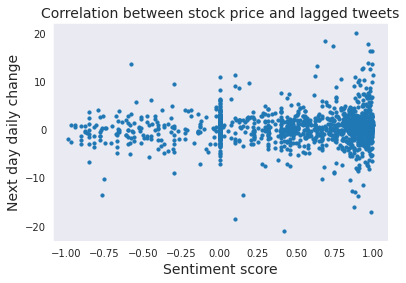

In [9]:
# Show the correlation beetween sentiment score and next day stock change
plt.scatter(merged.compound_sentiment, merged.daily_change_pred, s=10)
plt.xlabel('Sentiment score', fontsize=14)
plt.ylabel('Next day daily change', fontsize=14)
plt.title('Correlation between stock price and lagged tweets', fontsize=14)
plt.show()

In [10]:
# Calculating the correlation (pearson is the default method)
merged['compound_sentiment'].corr(merged['daily_change_pred'])

0.06601528626571015

The corrrelation is very low, implying that there is (at least) no linear relationship between today's sentiment score and tomorrows daily stock change

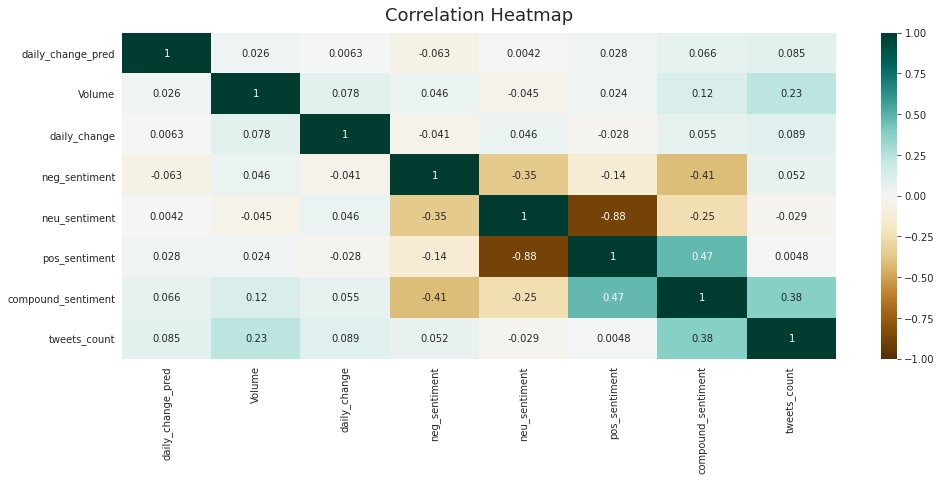

In [11]:
# Visualizing the corelations between all variables
merged.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(merged.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

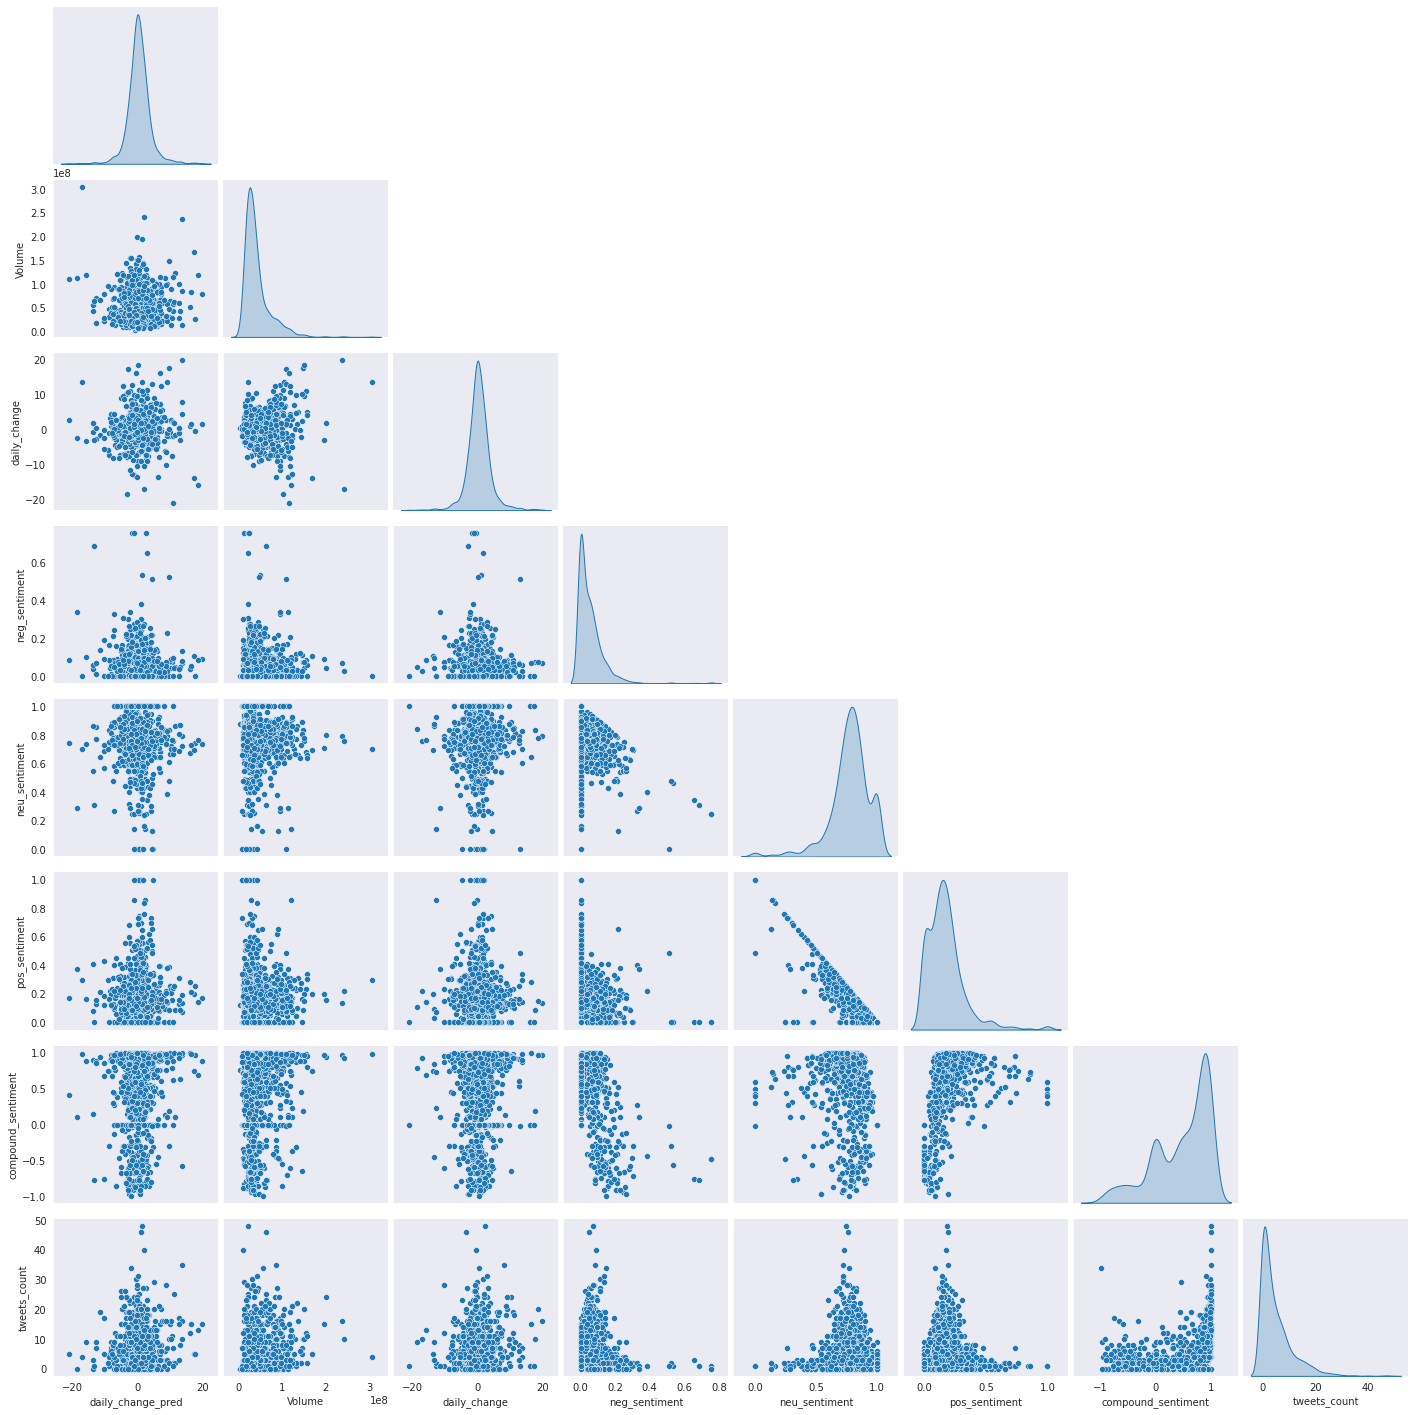

In [12]:
# Let's see a pairplot to visualize the scale of the data we have and the relation between variables
sns.pairplot(merged, corner=True, diag_kind='kde')

# Predicting stock movement (all variables)

## Setting x and y variables

In [13]:
# From above pairplot, we can also see that the variables have different scales which must be standardized 

# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

# Scaling data
scaled_data = StandardScaler().fit_transform(merged.loc[:,'Volume':'tweets_count'])

In [14]:
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df.describe()

,0,1,2,3,4,5,6
count,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03
mean,4.142768e-16,-1.194264e-17,-3.353006e-16,3.469889e-16,-1.787525e-16,-2.524762e-16,-1.064753e-15
std,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00,1.000399e+00
min,-1.255595e+00,-5.921265e+00,-6.897559e-01,-4.798922e+00,-1.111100e+00,-2.904856e+00,-8.050471e-01
25%,-6.321047e-01,-4.576500e-01,-6.897559e-01,-3.768626e-01,-6.138951e-01,-9.401016e-01,-8.050471e-01
50%,-3.051399e-01,-3.338446e-02,-2.530876e-01,1.021166e-01,-1.363169e-01,3.265828e-01,-3.142760e-01
75%,2.360811e-01,4.418557e-01,3.120127e-01,5.749154e-01,3.608879e-01,8.519780e-01,3.400855e-01
max,8.848481e+00,5.462310e+00,9.019694e+00,1.381455e+00,5.431068e+00,1.049350e+00,7.047290e+00


StandardScaler enables us to obtain scaled data with means very close to 0 (note, the values contain high exponents) and the standard deviations close to 1. 

In [15]:
# As we have text values fo y, we must use LabelEncoder to transform to integers

# Importing packages
from sklearn.preprocessing import LabelEncoder

# Defining X and y values (transforming text to integers for y)
X = scaled_data

y = merged.loc[:,'change_categorical']
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [16]:
# Importing train test split: 
from sklearn.model_selection import train_test_split

In [17]:
# Defining the train (80%) and test (20%) data set (setting shuffle to false in order to preserve the sequential aspect of the times series)
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size=0.8, test_size=0.2, random_state = 0, shuffle=False)

## Baseline model

In [18]:
#Import dummy classifier
from sklearn.dummy import DummyClassifier

# Import classification report
from sklearn.metrics import classification_report

In [19]:
#Set parameters for baseline model
dummy = DummyClassifier(strategy='stratified', random_state=0)

# "Train" model
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='stratified')

In [20]:
# Model evaluation 
dummy.score(X_test, y_test)

0.549800796812749

In [21]:
# Set baseline prediction
y_pred_dummy = dummy.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred_dummy))

              precision    recall  f1-score   support

           0       0.48      0.56      0.52       108
           1       0.62      0.54      0.58       143

    accuracy                           0.55       251
   macro avg       0.55      0.55      0.55       251
weighted avg       0.56      0.55      0.55       251



In [23]:
# Finding true stock change
true_change = labelencoder_y.inverse_transform(y_test)

In [24]:
# Predicting the change in stock price and obtaining the initial labels of change in stock price
predicted_change_dummy = labelencoder_y.inverse_transform(y_pred_dummy)

# Obtaining confusion matrix
result_dummy = pd.DataFrame({'true_change': true_change, 'predicted_change': predicted_change_dummy})
pd.crosstab(result_dummy.true_change, result_dummy.predicted_change)

predicted_change,Decrease,Increase
true_change,,
Decrease,61,47
Increase,66,77


## Gridsearch for models

In [25]:
# Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Defining models
m_lr = LogisticRegression()
m_rf = RandomForestClassifier()
m_xgb = XGBClassifier()
m_knn = KNeighborsClassifier()
m_svc = SVC()

In [26]:
# Setting parameters for gridsearch
parameters_lr = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10],  'solver': ['liblinear']}
parameters_rf = {'n_estimators':[10, 50, 100, 150, 200], 'criterion':('gini', 'entropy')}
parameters_xgb = {'n_estimators':[10, 50, 100, 150, 200], 'learning_rate': [0.001, 0.005, 0.01, 0.1], 'max_depth': [4, 6, 8, 10], 'gamma': [0, 0.001, 0.005, 0.01, 0.02]}
parameters_knn = {'weights':('uniform', 'distance'), 'n_neighbors':[3, 5, 7, 10, 25]}
parameters_svc = [{'kernel': ['rbf'], 'gamma': [0.01, 0.1, 1, 10, 100], 'C': [0.1, 1, 10, 100, 1000]},
                  {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]}]

In [27]:
# Importing evaluation parameters
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer

# Importing gridsearch
from sklearn.model_selection import GridSearchCV

# Importing time series split
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=30)

# Set scorer for optimal model
scorer = make_scorer(accuracy_score)

# Setting grid object using scorer as the scoring method
grid_obj_lr = GridSearchCV(m_lr, parameters_lr, scoring=scorer, cv=tscv)
grid_obj_rf = GridSearchCV(m_rf, parameters_rf, scoring=scorer, cv=tscv)
grid_obj_xgb = GridSearchCV(m_xgb, parameters_xgb, scoring=scorer, cv=tscv)
grid_obj_knn = GridSearchCV(m_knn, parameters_knn, scoring=scorer, cv=tscv)
grid_obj_svc = GridSearchCV(m_svc, parameters_svc, scoring=scorer, cv=tscv)

In [ ]:
# Fitting the grid search to the training data
# NOTE: Takes a long time to run
grid_fit_lr = grid_obj_lr.fit(X_train, y_train)
grid_fit_rf = grid_obj_rf.fit(X_train, y_train)
grid_fit_xgb = grid_obj_xgb.fit(X_train, y_train)
grid_fit_knn = grid_obj_knn.fit(X_train, y_train)
grid_fit_svc = grid_obj_svc.fit(X_train, y_train)

## Model Creation

In [29]:
# Get the best model with the optimal hyperparamters
best_lr = grid_fit_lr.best_estimator_
best_rf = grid_fit_rf.best_estimator_
best_xgb = grid_fit_xgb.best_estimator_
best_knn = grid_fit_knn.best_estimator_
best_svc = grid_fit_svc.best_estimator_

In [30]:
# Fit the best model to the data
print("Logistics Regression:")
print(best_lr.fit(X_train, y_train))
print("Random forest:")
print(best_rf.fit(X_train, y_train))
print("XGBoost:")
print(best_xgb.fit(X_train, y_train))
print("Kneighbors:")
print(best_knn.fit(X_train, y_train))
print("Support Vector Classifier:")
print(best_svc.fit(X_train, y_train))

Logistics Regression:
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Random forest:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
XGBoost:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           

##Model evaluation

**Accuracy**

In [31]:
# Printing accuracy scores
print("Logistic Regression:\t\t" + str(best_lr.score(X_test, y_test)))
print("Random forest:\t\t\t" + str(best_rf.score(X_test, y_test)))
print("XGBoost:\t\t\t" + str(best_xgb.score(X_test, y_test)))
print("Kneighbors:\t\t\t" + str(best_knn.score(X_test, y_test)))
print("Support Vector Classifier:\t" + str(best_svc.score(X_test, y_test)))

Logistic Regression:		0.49800796812749004
Random forest:			0.4940239043824701
XGBoost:			0.5338645418326693
Kneighbors:			0.47808764940239046
Support Vector Classifier:	0.4541832669322709


**Confusion matrix**

*Logistic regression*

In [32]:
# Predicting the change in stock price and obtaining the initial labels of change in stock price
y_pred_lr = best_lr.predict(X_test)
predicted_change_lr = labelencoder_y.inverse_transform(y_pred_lr)

# Obtaining confusion matrix
result_lr = pd.DataFrame({'true_change': true_change, 'predicted_change': predicted_change_lr})
pd.crosstab(result_lr.true_change, result_lr.predicted_change)

predicted_change,Decrease,Increase
true_change,,
Decrease,62,46
Increase,80,63


*Random forest*

In [33]:
# Predicting the change in stock price and obtaining the initial labels of change in stock price
y_pred_rf = best_rf.predict(X_test)
predicted_change_rf = labelencoder_y.inverse_transform(y_pred_rf)

# Obtaining confusion matrix
result_rf = pd.DataFrame({'true_change': true_change, 'predicted_change': predicted_change_rf}) 

pd.crosstab(result_rf.true_change, result_rf.predicted_change)

predicted_change,Decrease,Increase
true_change,,
Decrease,50,58
Increase,69,74


*XGBoost*

In [34]:
# Predicting the change in stock price and obtaining the initial labels of change in stock price
y_pred_xgb = best_xgb.predict(X_test)
predicted_change_xgb = labelencoder_y.inverse_transform(y_pred_xgb)

# Obtaining confusion matrix
result_xgb = pd.DataFrame({'true_change': true_change, 'predicted_change': predicted_change_xgb}) 

pd.crosstab(result_xgb.true_change, result_xgb.predicted_change)

predicted_change,Decrease,Increase
true_change,,
Decrease,45,63
Increase,54,89


*k-Nearest Neighbors*

In [35]:
# Predicting the change in stock price and obtaining the initial labels of change in stock price
y_pred_knn = best_knn.predict(X_test)
predicted_change_knn = labelencoder_y.inverse_transform(y_pred_knn)

# Obtaining confusion matrix
result_knn = pd.DataFrame({'true_change': true_change, 'predicted_change': predicted_change_knn})

pd.crosstab(result_knn.true_change, result_knn.predicted_change)

predicted_change,Decrease,Increase
true_change,,
Decrease,51,57
Increase,74,69


*Support Vector classifier*

In [36]:
# Predicting the change in stock price and obtaining the initial labels of change in stock price
y_pred_svc = best_svc.predict(X_test)
predicted_change_svc = labelencoder_y.inverse_transform(y_pred_svc)

# Obtaining confusion matrix
result_svc = pd.DataFrame({'true_change': true_change, 'predicted_change': predicted_change_svc}) 

pd.crosstab(result_svc.true_change, result_svc.predicted_change)

predicted_change,Decrease,Increase
true_change,,
Decrease,88,20
Increase,117,26


**Classification reports**

In [37]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.44      0.57      0.50       108
           1       0.58      0.44      0.50       143

    accuracy                           0.50       251
   macro avg       0.51      0.51      0.50       251
weighted avg       0.52      0.50      0.50       251



In [38]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.42      0.46      0.44       108
           1       0.56      0.52      0.54       143

    accuracy                           0.49       251
   macro avg       0.49      0.49      0.49       251
weighted avg       0.50      0.49      0.50       251



In [39]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.45      0.42      0.43       108
           1       0.59      0.62      0.60       143

    accuracy                           0.53       251
   macro avg       0.52      0.52      0.52       251
weighted avg       0.53      0.53      0.53       251



In [40]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.41      0.47      0.44       108
           1       0.55      0.48      0.51       143

    accuracy                           0.48       251
   macro avg       0.48      0.48      0.48       251
weighted avg       0.49      0.48      0.48       251



In [41]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.43      0.81      0.56       108
           1       0.57      0.18      0.28       143

    accuracy                           0.45       251
   macro avg       0.50      0.50      0.42       251
weighted avg       0.51      0.45      0.40       251



**Testing for overfitting/underfitting**

In [42]:
# Importing AUC score and ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Calculating proba (if the model prediction is correct)  
best_xgb_proba_train = best_xgb.predict_proba(X_train)
best_xgb_proba_test = best_xgb.predict_proba(X_test)
 
# Calculating AUC scores
auc_score_train = roc_auc_score(y_train, best_xgb_proba_train[:,1])
auc_score_test = roc_auc_score(y_test, best_xgb_proba_test[:,1])
 
print(auc_score_train, auc_score_test)

0.7155578483700074 0.4986078736078736


In [43]:
# ROC curve for models
fpr1, tpr1, thresh1 = roc_curve(y_train, best_xgb_proba_train[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, best_xgb_proba_test[:,1], pos_label=1)
 
# Creating line for when tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

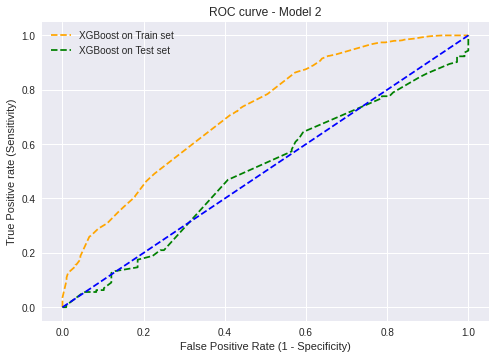

In [44]:
# Plotting the ROC curve
plt.style.use('seaborn')
 
# Plotting ROC curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGBoost on Train set')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='XGBoost on Test set')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve - Model 2')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive rate (Sensitivity)')
 
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**Pemutation importance for best model**

In [46]:
# Importing permutation importance
from sklearn.inspection import permutation_importance

Text(0.5, 0, 'Permutation Importance')

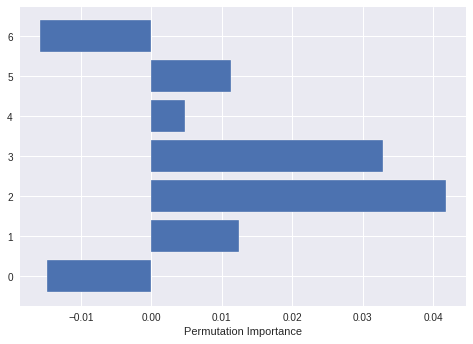

In [47]:
# Visualizaing the permutation importance (the decrease in a model score when a single feature value is randomly shuffled)
# Negative score indicates noise in the model (note: only indicative)
perm_importance = permutation_importance(best_xgb, X_test, y_test, n_repeats=100, random_state=100)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(sorted_idx, perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# Predicting stock movement (sentiment score only)

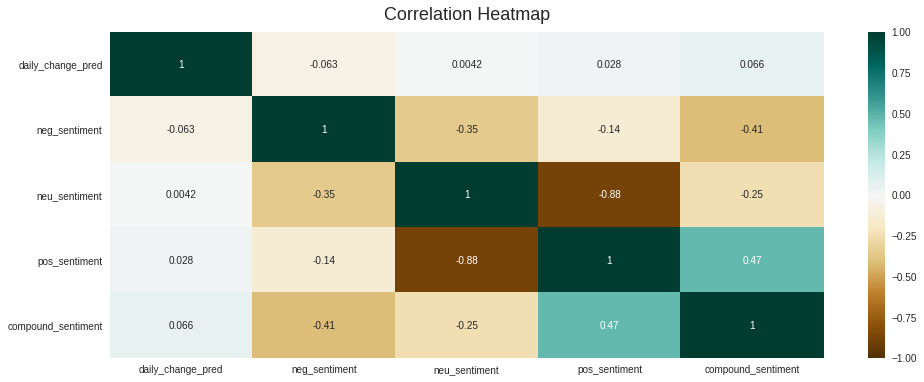

In [46]:
# Visualizing the corelations between all variables

merged_s = merged.loc[:,['daily_change_pred', 'neg_sentiment', 'neu_sentiment', 'pos_sentiment', 'compound_sentiment']]

merged_s.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(merged_s.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

## Setting new x variables

In [47]:
# From above pairplot, we can also see that the variables have different scales which must be standardized 

# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

# Scaling data
scaled_data_s = StandardScaler().fit_transform(merged.loc[:,'neg_sentiment':'compound_sentiment'])
X_s=scaled_data_s

In [48]:
# Defining the train (80%) and test (20%) data set (setting shuffle to false in order)
X_train, X_test, y_train, y_test = train_test_split(X_s, y , train_size=0.8, test_size=0.2, random_state = 0, shuffle=False)

##Gridsearch for models

In [49]:
# Setting grid object using scorer as the scoring method
grid_obj_lr = GridSearchCV(m_lr, parameters_lr, scoring=scorer, cv=tscv)
grid_obj_rf = GridSearchCV(m_rf, parameters_rf, scoring=scorer, cv=tscv)
grid_obj_xgb = GridSearchCV(m_xgb, parameters_xgb, scoring=scorer, cv=tscv)
grid_obj_knn = GridSearchCV(m_knn, parameters_knn, scoring=scorer, cv=tscv)
grid_obj_svc = GridSearchCV(m_svc, parameters_svc, scoring=scorer, cv=tscv)

In [ ]:
# Fitting the grid search to the training data
# NOTE: Takes a long time to run
grid_fit_lr = grid_obj_lr.fit(X_train, y_train)
grid_fit_rf = grid_obj_rf.fit(X_train, y_train)
grid_fit_xgb = grid_obj_xgb.fit(X_train, y_train)
grid_fit_knn = grid_obj_knn.fit(X_train, y_train)
grid_fit_svc = grid_obj_svc.fit(X_train, y_train)

##Model creation

In [51]:
# Get the best model with the optimal hyperparameters
best_lr_s = grid_fit_lr.best_estimator_
best_rf_s = grid_fit_rf.best_estimator_
best_xgb_s = grid_fit_xgb.best_estimator_
best_knn_s = grid_fit_knn.best_estimator_
best_svc_s = grid_fit_svc.best_estimator_

In [52]:
# Fit the best model to the data
print("")
print(best_lr_s.fit(X_train, y_train))
print("")
print(best_rf_s.fit(X_train, y_train))
print("")
print(best_xgb_s.fit(X_train, y_train))
print("")
print(best_knn_s.fit(X_train, y_train))
print("")
print(best_svc_s.fit(X_train, y_train))


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 

##Model evaluation

**Accuracy**

In [53]:
#Printing accuracy scores
print("Logistic Regression:\t\t" + str(best_lr_s.score(X_test, y_test)))
print("Random forest:\t\t\t" + str(best_rf_s.score(X_test, y_test)))
print("XGBoost:\t\t\t" + str(best_xgb_s.score(X_test, y_test)))
print("Kneighbors:\t\t\t" + str(best_knn_s.score(X_test, y_test)))
print("Support Vector Classifier:\t" + str(best_svc_s.score(X_test, y_test)))

Logistic Regression:		0.5179282868525896
Random forest:			0.47410358565737054
XGBoost:			0.5139442231075697
Kneighbors:			0.450199203187251
Support Vector Classifier:	0.4820717131474104


**Confusion matrix**

*Logistic regression*

In [54]:
# Predicting the change in stock price and obtaining the initial labels of change in stock price
y_pred_lr_s = best_lr_s.predict(X_test)
predicted_change_lr_s = labelencoder_y.inverse_transform(y_pred_lr_s)

# Obtaining confusion matrix
result_lr_s = pd.DataFrame({'true_change': true_change, 'predicted_change': predicted_change_lr_s})
pd.crosstab(result_lr_s.true_change, result_lr_s.predicted_change)

predicted_change,Decrease,Increase
true_change,,
Decrease,44,64
Increase,57,86


*Random forest*

In [55]:
# Predicting the change in stock price and obtaining the initial labels of change in stock price
y_pred_rf_s = best_rf_s.predict(X_test)
predicted_change_rf_s = labelencoder_y.inverse_transform(y_pred_rf_s)

# Obtaining confusion matrix
result_rf_s = pd.DataFrame({'true_change': true_change, 'predicted_change': predicted_change_rf_s}) 

pd.crosstab(result_rf_s.true_change, result_rf_s.predicted_change)

predicted_change,Decrease,Increase
true_change,,
Decrease,49,59
Increase,73,70


*XGBoost*

In [56]:
# Predicting the change in stock price and obtaining the initial labels of change in stock price
y_pred_xgb_s = best_xgb_s.predict(X_test)
predicted_change_xgb_s = labelencoder_y.inverse_transform(y_pred_xgb_s)

# Obtaining confusion matrix
result_xgb_s = pd.DataFrame({'true_change': true_change, 'predicted_change': predicted_change_xgb_s}) 

pd.crosstab(result_xgb_s.true_change, result_xgb_s.predicted_change)

predicted_change,Decrease,Increase
true_change,,
Decrease,45,63
Increase,59,84


*k-Nearest Neighbors*

In [57]:
# Predicting the change in stock price and obtaining the initial labels of change in stock price
y_pred_knn_s = best_knn_s.predict(X_test)
predicted_change_knn_s = labelencoder_y.inverse_transform(y_pred_knn_s)

# Obtaining confusion matrix
result_knn_s = pd.DataFrame({'true_change': true_change, 'predicted_change': predicted_change_knn_s})

pd.crosstab(result_knn_s.true_change, result_knn_s.predicted_change)

predicted_change,Decrease,Increase
true_change,,
Decrease,38,70
Increase,68,75


*Support Vector classifier*

In [58]:
# Predicting the change in stock price and obtaining the initial labels of change in stock price
y_pred_svc_s = best_svc_s.predict(X_test)
predicted_change_svc_s = labelencoder_y.inverse_transform(y_pred_svc_s)

# Obtaining confusion matrix
result_svc_s = pd.DataFrame({'true_change': true_change, 'predicted_change': predicted_change_svc_s}) 

pd.crosstab(result_svc_s.true_change, result_svc_s.predicted_change)

predicted_change,Decrease,Increase
true_change,,
Decrease,45,63
Increase,67,76


**Classification report**

In [59]:
print(classification_report(y_test, y_pred_lr_s))

              precision    recall  f1-score   support

           0       0.44      0.41      0.42       108
           1       0.57      0.60      0.59       143

    accuracy                           0.52       251
   macro avg       0.50      0.50      0.50       251
weighted avg       0.51      0.52      0.52       251



In [60]:
print(classification_report(y_test, y_pred_rf_s))

              precision    recall  f1-score   support

           0       0.40      0.45      0.43       108
           1       0.54      0.49      0.51       143

    accuracy                           0.47       251
   macro avg       0.47      0.47      0.47       251
weighted avg       0.48      0.47      0.48       251



In [61]:
print(classification_report(y_test, y_pred_xgb_s))

              precision    recall  f1-score   support

           0       0.43      0.42      0.42       108
           1       0.57      0.59      0.58       143

    accuracy                           0.51       251
   macro avg       0.50      0.50      0.50       251
weighted avg       0.51      0.51      0.51       251



In [62]:
print(classification_report(y_test, y_pred_knn_s))

              precision    recall  f1-score   support

           0       0.36      0.35      0.36       108
           1       0.52      0.52      0.52       143

    accuracy                           0.45       251
   macro avg       0.44      0.44      0.44       251
weighted avg       0.45      0.45      0.45       251



In [63]:
print(classification_report(y_test, y_pred_svc_s))

              precision    recall  f1-score   support

           0       0.40      0.42      0.41       108
           1       0.55      0.53      0.54       143

    accuracy                           0.48       251
   macro avg       0.47      0.47      0.47       251
weighted avg       0.48      0.48      0.48       251



**Testing for overfitting/underfitting**

In [64]:
# Calculating proba (if the model prediction is correct)  
best_lr_s_proba_train = best_lr_s.predict_proba(X_train)
best_lr_s_proba_test = best_lr_s.predict_proba(X_test)
 
# Calculating AUC scores
auc_score_train = roc_auc_score(y_train, best_lr_s_proba_train[:,1])
auc_score_test = roc_auc_score(y_test, best_lr_s_proba_test[:,1])
 
print(auc_score_train, auc_score_test)

0.5284231829996626 0.4868557368557369


In [65]:
# ROC curve for models
fpr1, tpr1, thresh1 = roc_curve(y_train, best_lr_s_proba_train[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, best_lr_s_proba_test[:,1], pos_label=1)
 
# Creating line for when tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

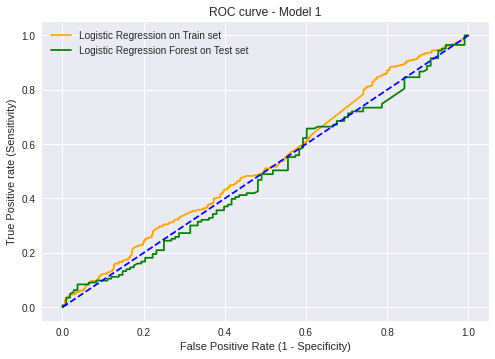

In [71]:
# Plotting the ROC curve
plt.style.use('seaborn')
 
# Plotting ROC curves
plt.plot(fpr1, tpr1, linestyle='-',color='orange', label='Logistic Regression on Train set')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='Logistic Regression Forest on Test set')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve - Model 1')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive rate (Sensitivity)')
 
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**Import to pdf**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%%capture 
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py 
from colab_pdf import colab_pdf 
colab_pdf('Predicting_stock_price_(not_filtered_on_Tesla_topic))')